<a href="https://colab.research.google.com/github/Vishal-74/MachineLearningProjects/blob/main/classifying_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

In [2]:
import tensorflow as tf

In [3]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

logging - This code will set the TensorFlow logger to display only error messages and suppress messages of lower severity levels like INFO and WARNING.

In [4]:
import logging
tf.get_logger().setLevel(logging.ERROR)

the metadata contains information about the features, including the labels.

In [5]:
fashion_mnist_1 = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist_1.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
len(train_labels)

60000

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
len(test_labels)

10000

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

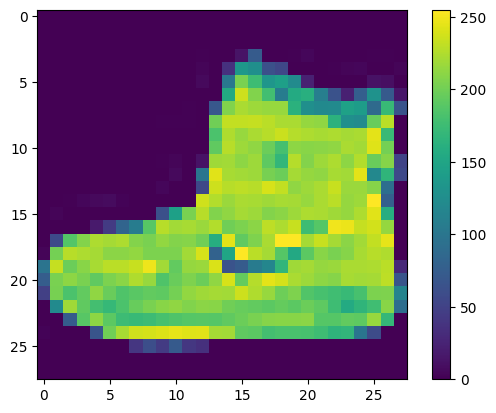

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

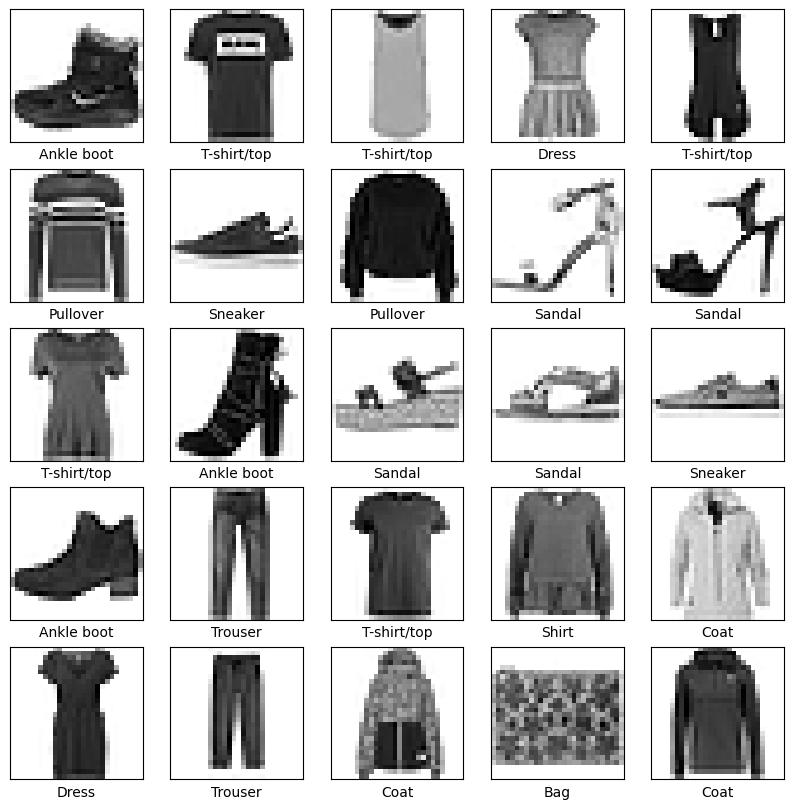

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4978 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3791 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3379 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3132 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2962 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2815 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2693 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2590 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2496 - accuracy: 0.9066
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3496 - accuracy: 0.8809 - 953ms/epoch - 3ms/step

Test accuracy: 0.8809000253677368


In [18]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [20]:
predictions[0]

array([8.7100585e-07, 2.7815330e-12, 2.2607267e-09, 2.9199119e-09,
       1.7043589e-09, 6.1978346e-05, 6.3435863e-08, 2.4609815e-03,
       1.2870061e-07, 9.9747592e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

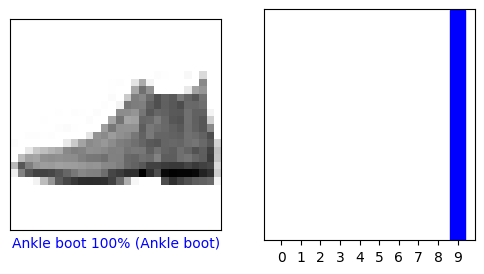

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

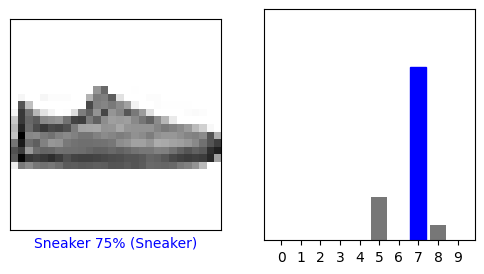

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

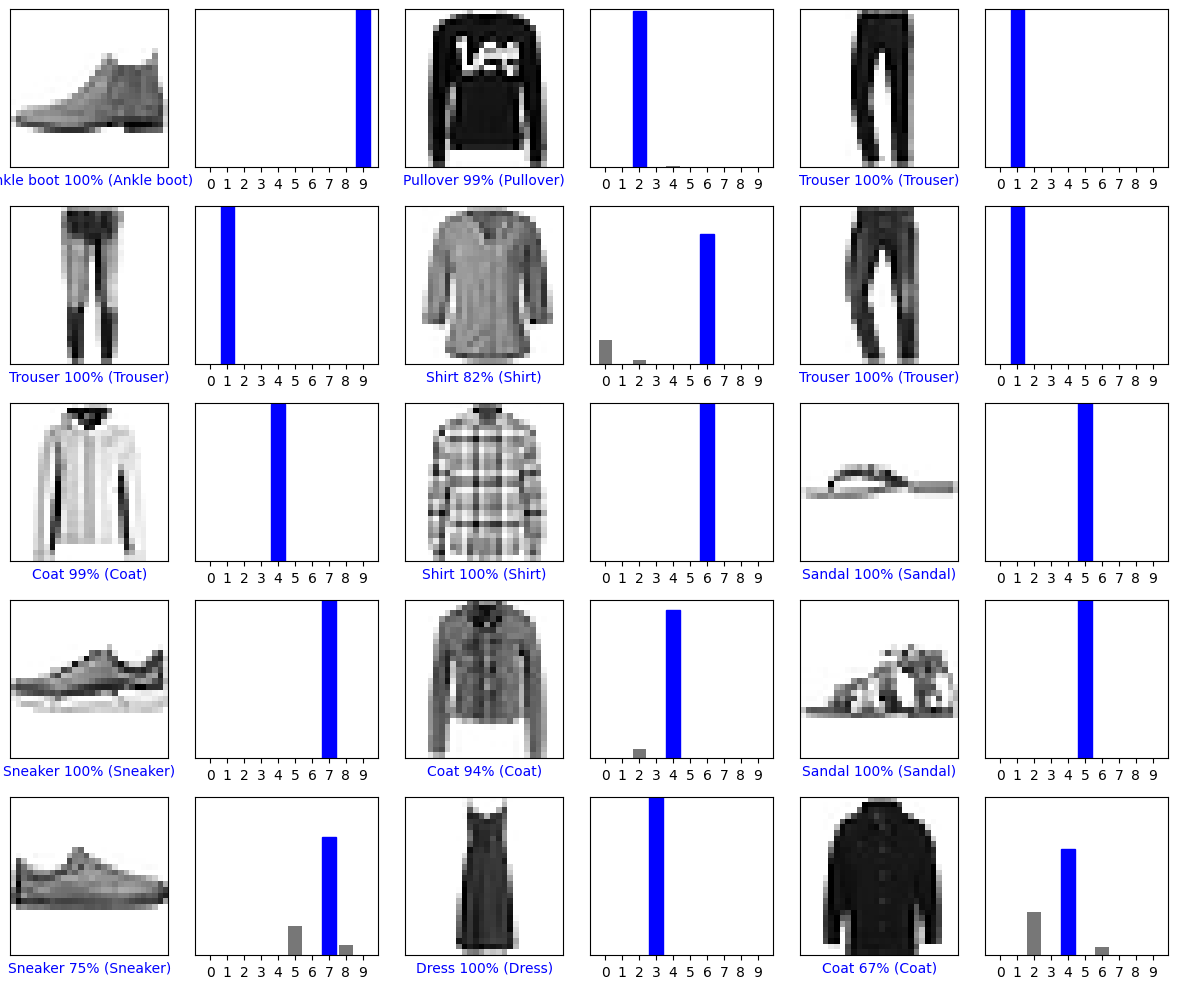

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 41ms/step
[[6.8910122e-05 2.5844999e-12 9.8955578e-01 1.2978306e-10 9.2261853e-03
  4.6940875e-11 1.1491353e-03 4.3494282e-18 1.4414585e-10 8.3567694e-16]]


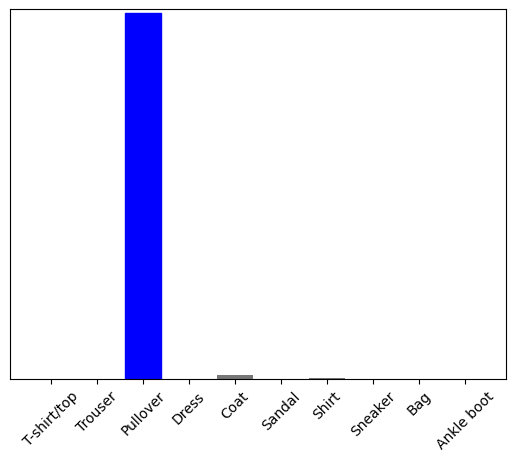

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
np.argmax(predictions_single[0])

2

#other method

In [32]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [33]:
train_dataset, test_dataset = dataset['train'], dataset['test']

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [34]:
print(metadata.features)
print(metadata.description)

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


In [35]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [36]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


Plotting the data


In [37]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

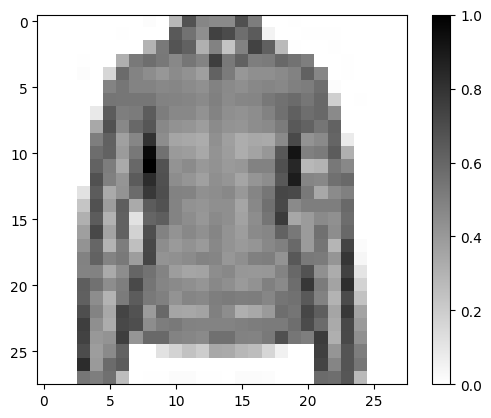

In [38]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

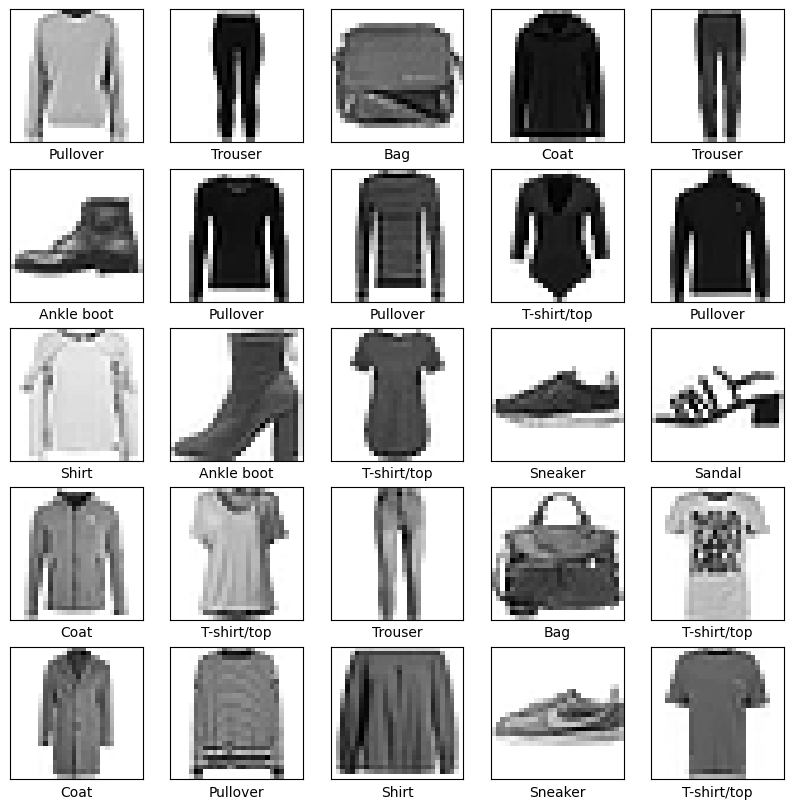

In [39]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

Setup the layers

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

This network has three layers:

* **input** `tf.keras.layers.Flatten` — This layer transforms the images from a 2d-array of 28 $\times$ 28 pixels, to a 1d-array of 784 pixels (28\*28). (unstacking rows of pixels in the image and lining them up)



> Note: Using `softmax` activation and `SparseCategoricalCrossentropy()` has issues and which are patched by the `tf.keras` model. A safer approach, in general, is to use a linear output (no activation function) with `SparseCategoricalCrossentropy(from_logits=True)`.


### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Train the model

First, we define the iteration behavior for the train dataset:
1. Repeat forever by specifying `dataset.repeat()` (the `epochs` parameter described below limits how long we perform training).
2. The `dataset.shuffle(60000)` randomizes the order so our model cannot learn anything from the order of the examples.
3. And `dataset.batch(32)` tells `model.fit` to use batches of 32 images and labels when updating the model variables.

Training is performed by calling the `model.fit` method:
1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `epochs=5` parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

(Don't worry about `steps_per_epoch`, the requirement to have this flag will soon be removed.)

In [42]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [43]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.4964 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3746 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3440 - accuracy: 0.8742
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3185 - accuracy: 0.8826
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2917 - accuracy: 0.8925


In [44]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.3573 - accuracy: 0.8714
Accuracy on test dataset: 0.871399998664856


### Making Predictions

In [45]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 45ms/step


In [46]:
predictions.shape


(32, 10)

In [47]:
predictions[0]

array([6.5235145e-05, 9.8006538e-05, 1.0488054e-02, 8.2623177e-07,
       9.7413540e-01, 3.0103743e-07, 1.5106709e-02, 4.5828585e-09,
       1.0535204e-04, 8.6687372e-08], dtype=float32)

In [48]:
np.argmax(predictions[0])

4

In [49]:
test_labels[0]

4

In [50]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

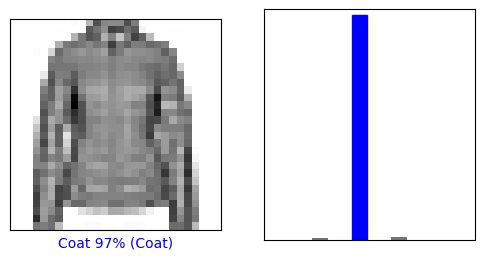

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

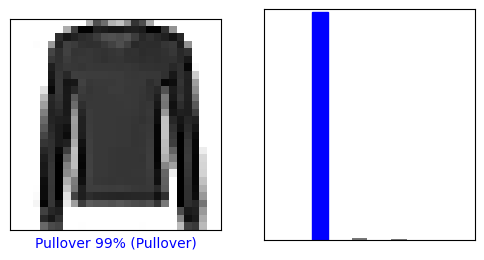

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

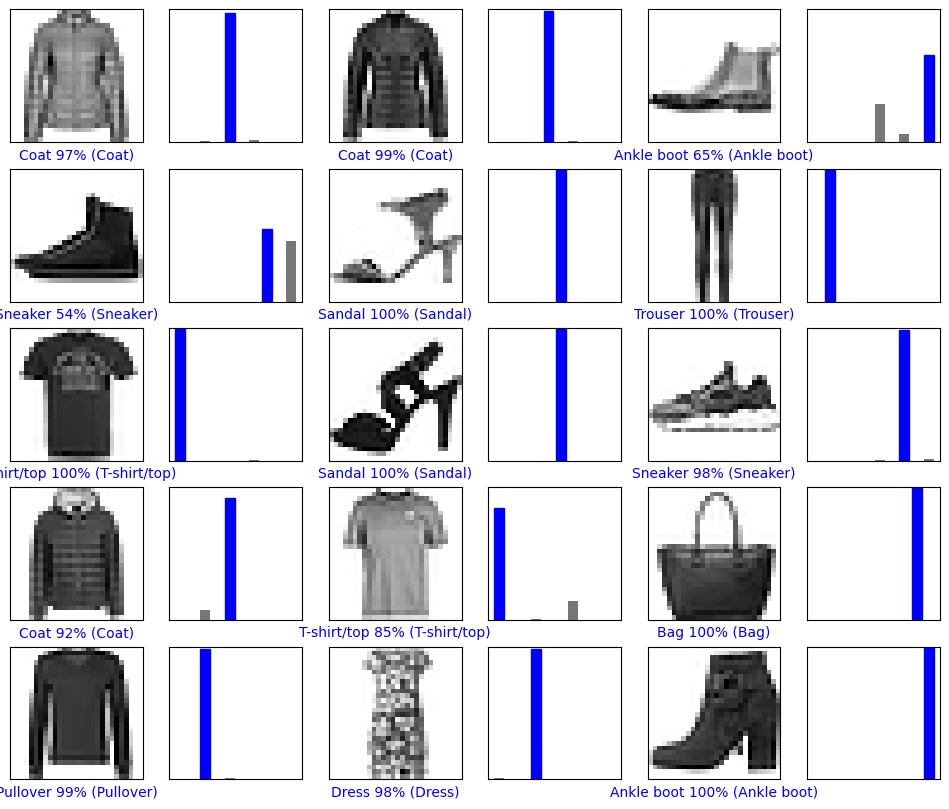

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [54]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [55]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [56]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 57ms/step
[[6.5235028e-05 9.8006458e-05 1.0488039e-02 8.2623097e-07 9.7413540e-01
  3.0103715e-07 1.5106694e-02 4.5828585e-09 1.0535184e-04 8.6687372e-08]]


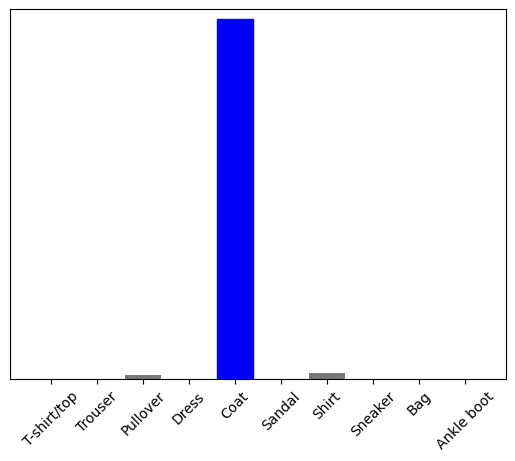

In [57]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [58]:
np.argmax(predictions_single[0])

4

###CMM


In [59]:
modelc = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [60]:
modelc.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [61]:
modelc.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.3922 - accuracy: 0.8581
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2588 - accuracy: 0.9061
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2121 - accuracy: 0.9219
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1809 - accuracy: 0.9340
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1552 - accuracy: 0.9435
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1318 - accuracy: 0.9507
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1110 - accuracy: 0.9595
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0936 - accuracy: 0.9651
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0764 - accuracy: 0.9721
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.

In [77]:
test_loss, test_accuracy = modelc.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3404 - accuracy: 0.9143
Accuracy on test dataset: 0.9143000245094299


In [78]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = modelc.predict(test_images)

1/1 [==============================] - 0s 58ms/step


In [79]:
predictions.shape


(32, 10)

In [80]:
predictions[0]

array([8.4255242e-11, 3.4753546e-12, 1.7225083e-03, 1.2822681e-11,
       9.8006719e-01, 5.5895093e-12, 1.8210281e-02, 1.4456938e-11,
       3.6122253e-12, 3.1650377e-10], dtype=float32)

In [81]:
np.argmax(predictions[0])

4

In [82]:
test_labels[0]

4

In [83]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

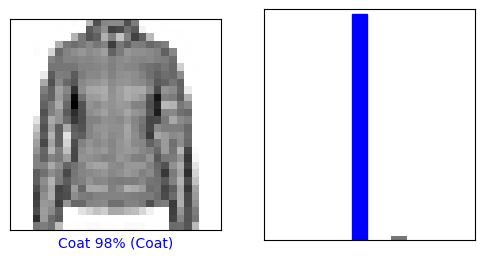

In [84]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

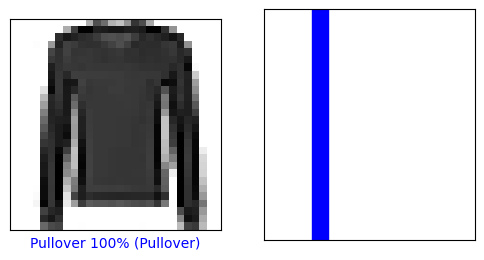

In [85]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

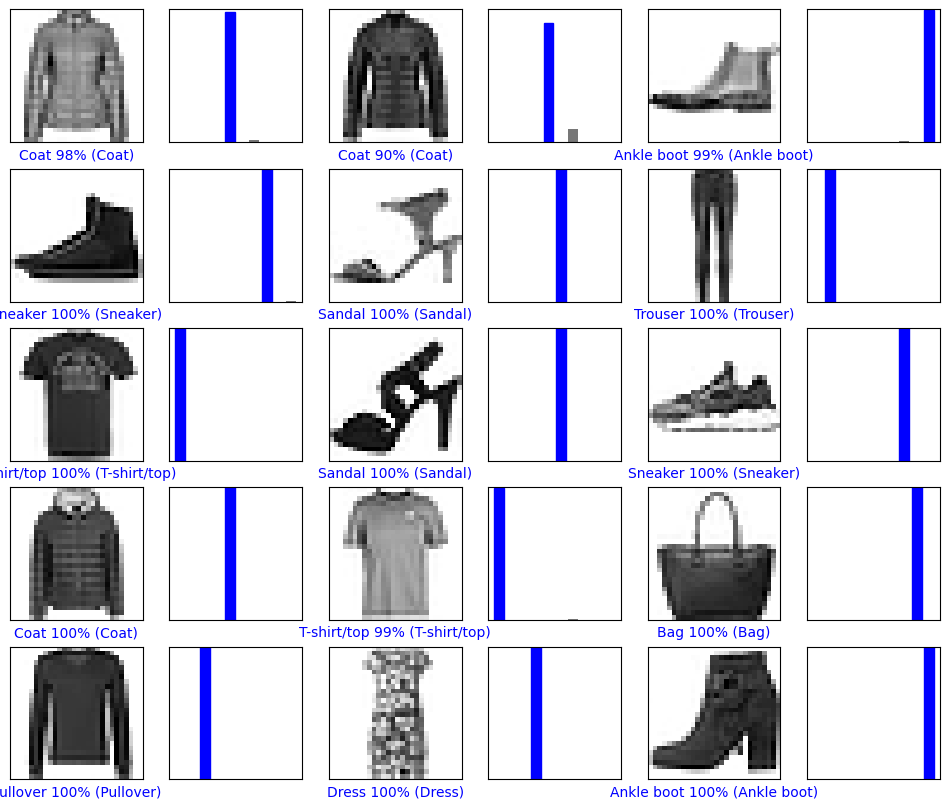

In [86]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [87]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [88]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [89]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[6.5235028e-05 9.8006458e-05 1.0488039e-02 8.2623097e-07 9.7413540e-01
  3.0103715e-07 1.5106694e-02 4.5828585e-09 1.0535184e-04 8.6687372e-08]]


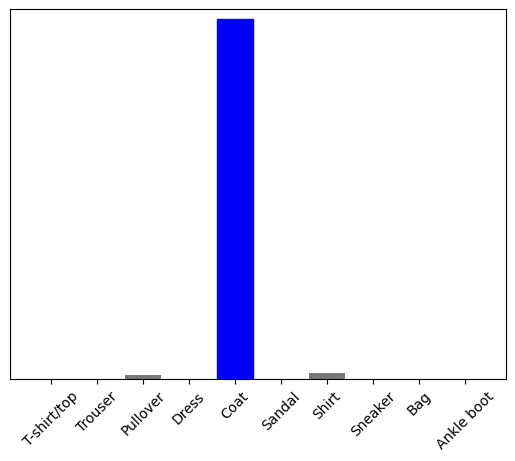

In [90]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [91]:
np.argmax(predictions_single[0])

4